## Employing PyCaret to develop ADDPREV ML Model Development Process

### ADDPREV - (SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD)

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 69.3 MB/s eta 0:

In [3]:
# Import dependencies
import pandas as pd
import numpy as np
from pycaret.classification import *

In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Load the file from Google Drive
dataframe_path = '/content/drive/MyDrive/Bootcamp/substance-use-mental-illness-analysis/data/dataframe.csv'
df = pd.read_csv(dataframe_path)

Mounted at /content/drive


In [8]:
df.head()

,CIGEVER,MJEVER,ALCEVER,COCEVER,CRKEVER,HEREVER,LSD,METHAMEVR,IRIMPREMEM,ADDPREV,IRSUIPLANYR,ASDSREL2,IRAMDEYR,IRDSTCHR12
0,1,1,1,0,0,0,0,0,2,2,0.0,NaN,0.0,99
1,1,0,1,0,0,0,0,0,99,2,0.0,NaN,0.0,99
2,0,0,1,0,0,0,0,0,1,2,0.0,NaN,0.0,4
3,1,1,1,0,0,0,0,0,2,1,0.0,NaN,0.0,99
4,0,0,0,0,0,0,0,0,99,2,0.0,NaN,0.0,99


In [ ]:
# Compare number of Yes's across drug fields for descriptive analysis prior to modeling in presentation

In [9]:
# Clean data
addprev_df = df.drop(['IRIMPREMEM', 'IRSUIPLANYR', 'ASDSREL2',
       'IRAMDEYR', 'IRDSTCHR12'], axis=1)

# Keep only 1s and 2s
addprev_df = addprev_df[(addprev_df['ADDPREV'] == 1) | (addprev_df['ADDPREV'] == 2)]

# Change all 2s to 0s
addprev_df['ADDPREV'] = addprev_df['ADDPREV'].replace(2, 0)

# Inspect
addprev_df.head()

,CIGEVER,MJEVER,ALCEVER,COCEVER,CRKEVER,HEREVER,LSD,METHAMEVR,ADDPREV
0,1,1,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0


In [11]:
addprev_df.ADDPREV.value_counts()

0    29452
1    15988
Name: ADDPREV, dtype: int64

In [12]:
# import pycaret classification and init setup
s = setup(addprev_df, target = 'ADDPREV', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADDPREV
2,Target type,Binary
3,Original data shape,"(45440, 9)"
4,Transformed data shape,"(45440, 9)"
5,Transformed train set shape,"(31807, 9)"
6,Transformed test set shape,"(13633, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [14]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [15]:
# init setup on exp
exp.setup(addprev_df, target = 'ADDPREV', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADDPREV
2,Target type,Binary
3,Original data shape,"(45440, 9)"
4,Transformed data shape,"(45440, 9)"
5,Transformed train set shape,"(31807, 9)"
6,Transformed test set shape,"(13633, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [16]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6596,0.6284,0.1833,0.5491,0.2746,0.1196,0.1505,1.3500
ada,Ada Boost Classifier,0.6589,0.6288,0.1734,0.5492,0.2635,0.1137,0.1459,0.6650
lr,Logistic Regression,0.6588,0.6290,0.1728,0.5487,0.2627,0.1132,0.1453,1.0100
lda,Linear Discriminant Analysis,0.6587,0.6292,0.1807,0.5457,0.2713,0.1166,0.1472,0.1180
ridge,Ridge Classifier,0.6586,0.0000,0.1709,0.5483,0.2604,0.1118,0.1441,0.0690
rf,Random Forest Classifier,0.6583,0.6284,0.1810,0.5440,0.2714,0.1161,0.1462,1.2520
xgboost,Extreme Gradient Boosting,0.6583,0.6283,0.1794,0.5442,0.2696,0.1153,0.1457,2.0840
dt,Decision Tree Classifier,0.6582,0.6284,0.1791,0.5438,0.2692,0.1149,0.1453,0.1560
et,Extra Trees Classifier,0.6581,0.6281,0.1791,0.5436,0.2692,0.1148,0.1451,1.2690
svm,SVM - Linear Kernel,0.6579,0.0000,0.1716,0.5449,0.2608,0.1109,0.1424,0.3950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [17]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6596,0.6284,0.1833,0.5491,0.2746,0.1196,0.1505,0.1740
ada,Ada Boost Classifier,0.6589,0.6288,0.1734,0.5492,0.2635,0.1137,0.1459,0.1960
lr,Logistic Regression,0.6588,0.6290,0.1728,0.5487,0.2627,0.1132,0.1453,0.1240
lda,Linear Discriminant Analysis,0.6587,0.6292,0.1807,0.5457,0.2713,0.1166,0.1472,0.1250
ridge,Ridge Classifier,0.6586,0.0000,0.1709,0.5483,0.2604,0.1118,0.1441,0.0760
rf,Random Forest Classifier,0.6583,0.6284,0.1810,0.5440,0.2714,0.1161,0.1462,0.5180
xgboost,Extreme Gradient Boosting,0.6583,0.6283,0.1794,0.5442,0.2696,0.1153,0.1457,0.1180
dt,Decision Tree Classifier,0.6582,0.6284,0.1791,0.5438,0.2692,0.1149,0.1453,0.0930
et,Extra Trees Classifier,0.6581,0.6281,0.1791,0.5436,0.2692,0.1148,0.1451,0.2950
svm,SVM - Linear Kernel,0.6579,0.0000,0.1716,0.5449,0.2608,0.1109,0.1424,0.0680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

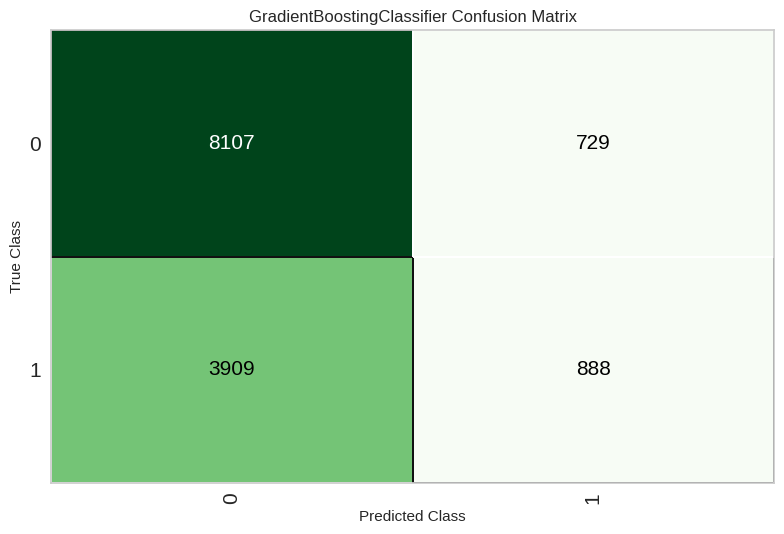

In [18]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

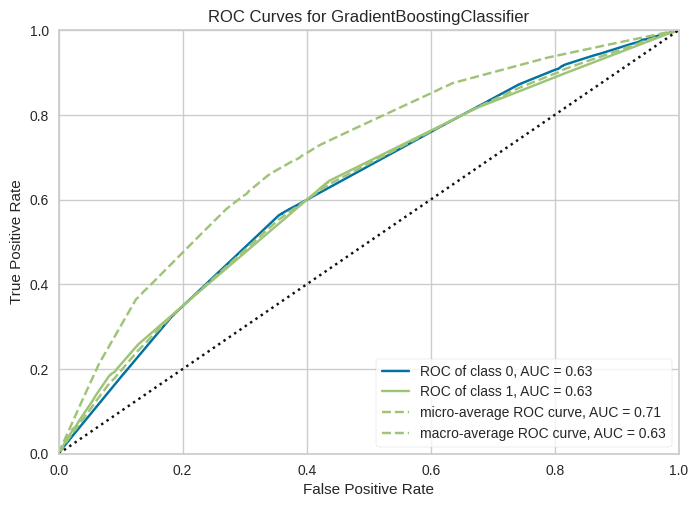

In [19]:
# plot AUC
plot_model(best, plot = 'auc')

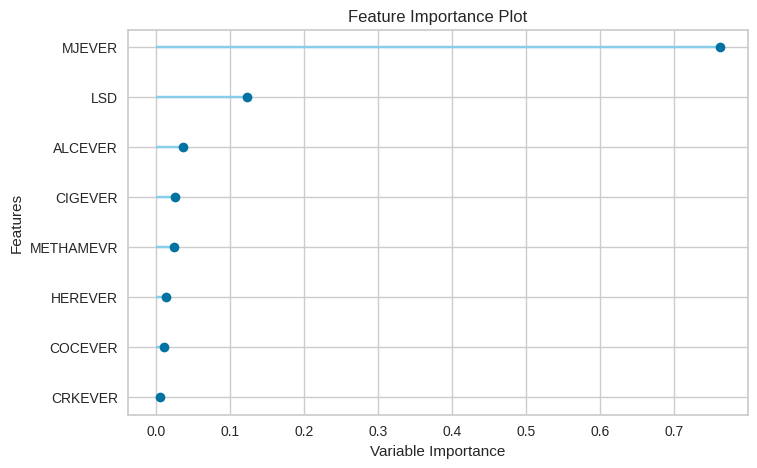

In [20]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# Revisit and/or expand upon WHY MJEVER might be so much more predictive/important than the other drugs (Y/N)

In [ ]:
 # Now that we know that MJEVER is "important", which more specific MJ variables (that aren't entirely colinear) could we introduce to the model?
 # Categorical (binned) variable for MJ usage quantity - pd.get_dummies()
 # MJ Days per Year Smoking (Binning) - binned and treated with pd.get_dummies()
 # Dollars Spent on MJ - categorical/binned ranges treated with pd.get_dummies()
 # HEALTH and Melissa's other variables

In [ ]:
# GBC

In [21]:
### Prediction

# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6598,0.6272,0.1851,0.5492,0.2769,0.1209,0.1516


In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline